In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [2]:
def show_metrics(model, meth, fset, x, y):

    if meth == "ovr":
        clf = OneVsRestClassifier(model)
        print("Logistic Regression on {} features with OneVsRest\n".format(fset))
    elif meth == "ovo":
        clf = OneVsOneClassifier(model)
        print("Logistic Regression on {} features with OneVsOne\n".format(fset))
    else:
        clf = model
        print("Logistic Regression on {} features \n".format(fset))
        
    scoring = { 'accuracy' : make_scorer(accuracy_score), 
                'precision' : make_scorer(precision_score, average='macro', zero_division=0),
                'recall' : make_scorer(recall_score, average='macro', zero_division=0), 
                'f1_score' : make_scorer(f1_score, average='macro', zero_division=0)}    
    kfold = KFold(n_splits=10)

    results = cross_validate(   estimator=clf,
                                X=x,
                                y=y,
                                cv=kfold,
                                scoring=scoring)
    print(f"Accuracy :{np.mean(results['test_accuracy'])}")
    print('-'*70)
    print(f"Precision :{np.mean(results['test_precision'])}")
    print('-'*70)
    print(f"Recall :{np.mean(results['test_recall'])}")
    print('-'*70)
    print(f"F1 score :{np.mean(results['test_f1_score'])}")
    print('-'*70)
    return results

# Data

In [3]:
df = pd.read_csv('movies.csv',index_col='Unnamed: 0')
# transform categorical values to numerical
directors = pd.get_dummies(df.Director, prefix='Director')
star1 = pd.get_dummies(df.Star1, prefix='star1')
star2 = pd.get_dummies(df.Star2, prefix='star2')
star3 = pd.get_dummies(df.Star3, prefix='star3')
star4 = pd.get_dummies(df.Star4, prefix='star4')
certificates = pd.get_dummies(df.Certificate, prefix='Certificate')
# concat numerical values with transformed categorical values
df = pd.concat([df, directors, certificates, star1, star2, star3, star4], axis=1)#, star1, star2, star3, star4
x = df.drop(columns=['Name', 'Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4','Genre'])
y = df['Genre']
# scale data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [4]:
df.shape

(1000, 3921)

In [10]:
# PCA features
df1 = pd.read_csv('PCA_data.csv',index_col='Unnamed: 0')
x1 = df1
y1 = df['Genre']
scaler1 = StandardScaler()
scaler1.fit(x1)
x1 = scaler1.transform(x1)

In [11]:
df2 = pd.read_csv('movies.csv',index_col='Unnamed: 0')
# certificates2 = pd.get_dummies(df2.Certificate, prefix='Certificate')
df2 = pd.concat([df2, directors, certificates, star1, star4], axis=1)
x2 = df2.drop(columns=['Name', 'Certificate', 'IMDB', 'Metascore', 'Date', 
                       'Duration', 'Director', 'Star1', 'Star2', 'Star3', 'Star4','Genre'])
y2 = df2['Genre']
scaler2 = StandardScaler()
scaler2.fit(x2)
x2 = scaler2.transform(x2)

# Logistic Regression

In [18]:
lr = LogisticRegression()
lr_results = show_metrics(lr, "ovr", "All", x, y)

Logistic Regression on All feature set with OneVsRest

Accuracy :0.381
----------------------------------------------------------------------
Precision :0.3267479904233034
----------------------------------------------------------------------
Recall :0.21573108739342603
----------------------------------------------------------------------
F1 score :0.20407616859608776
----------------------------------------------------------------------


In [19]:
lr_results_ovo = show_metrics(lr, "ovo", "All", x, y)

Logistic Regression on All feature set with OneVsOne

Accuracy :0.34700000000000003
----------------------------------------------------------------------
Precision :0.2621689039497722
----------------------------------------------------------------------
Recall :0.17141420892853199
----------------------------------------------------------------------
F1 score :0.13450536925509704
----------------------------------------------------------------------


In [20]:
lr_results1 = show_metrics(lr, "onr", "PCA", x1, y1)

Logistic Regression on PCA feature set

Accuracy :0.374
----------------------------------------------------------------------
Precision :0.30317769633076574
----------------------------------------------------------------------
Recall :0.29018333462904267
----------------------------------------------------------------------
F1 score :0.2761501853207943
----------------------------------------------------------------------


In [21]:
lr_results1_ovo = show_metrics(lr, "ovo", "PCA", x1, y1)

Logistic Regression on PCA feature set with OneVsOne

Accuracy :0.363
----------------------------------------------------------------------
Precision :0.3059843334460239
----------------------------------------------------------------------
Recall :0.29229411613059847
----------------------------------------------------------------------
F1 score :0.2796373957753283
----------------------------------------------------------------------


In [22]:
lr_results1 = show_metrics(lr, "ovr", "Selected", x2, y2)

Logistic Regression on Selected feature set with OneVsRest

Accuracy :0.379
----------------------------------------------------------------------
Precision :0.3365377690238994
----------------------------------------------------------------------
Recall :0.23665065753026915
----------------------------------------------------------------------
F1 score :0.24269582922648852
----------------------------------------------------------------------


In [23]:
lr_results1_ovo = show_metrics(lr, "ovo", "Selected", x2, y2)

Logistic Regression on Selected feature set with OneVsOne

Accuracy :0.352
----------------------------------------------------------------------
Precision :0.2518770242731338
----------------------------------------------------------------------
Recall :0.1801779671461992
----------------------------------------------------------------------
F1 score :0.15594160197641965
----------------------------------------------------------------------


# SVM

In [24]:
svm = SVC()
svm_results = show_metrics(svm, "ovr", "All", x, y)

Logistic Regression on All feature set with OneVsRest

Accuracy :0.346
----------------------------------------------------------------------
Precision :0.2588915015515875
----------------------------------------------------------------------
Recall :0.17137771866226237
----------------------------------------------------------------------
F1 score :0.13572572333666008
----------------------------------------------------------------------


In [25]:
svm_results_ovo = show_metrics(svm, "ovo", "All", x, y)

Logistic Regression on All feature set with OneVsOne

Accuracy :0.299
----------------------------------------------------------------------
Precision :0.08423742137319677
----------------------------------------------------------------------
Recall :0.13207477190207453
----------------------------------------------------------------------
F1 score :0.07030101549341797
----------------------------------------------------------------------


In [26]:
svm_results1 = show_metrics(svm, "ovr", "PCA", x1, y1)

Logistic Regression on PCA feature set with OneVsRest

Accuracy :0.42699999999999994
----------------------------------------------------------------------
Precision :0.3799936250641772
----------------------------------------------------------------------
Recall :0.3390261603889523
----------------------------------------------------------------------
F1 score :0.3249993248047459
----------------------------------------------------------------------


In [27]:
svm_results1_ovo = show_metrics(svm, "ovo", "PCA", x1, y1)

Logistic Regression on PCA feature set with OneVsOne

Accuracy :0.413
----------------------------------------------------------------------
Precision :0.3604441105964854
----------------------------------------------------------------------
Recall :0.24917537420771257
----------------------------------------------------------------------
F1 score :0.24063812886148553
----------------------------------------------------------------------


In [28]:
svm_results1 = show_metrics(svm, "ovr", "Selected", x2, y2)

Logistic Regression on Selected feature set with OneVsRest

Accuracy :0.35900000000000004
----------------------------------------------------------------------
Precision :0.2488129612924638
----------------------------------------------------------------------
Recall :0.1850343732862491
----------------------------------------------------------------------
F1 score :0.160799696400202
----------------------------------------------------------------------


In [29]:
svm_results1_ovo = show_metrics(svm, "ovo", "Selected", x2, y2)

Logistic Regression on Selected feature set with OneVsOne

Accuracy :0.301
----------------------------------------------------------------------
Precision :0.11913876646697745
----------------------------------------------------------------------
Recall :0.1361840727695507
----------------------------------------------------------------------
F1 score :0.077558458444609
----------------------------------------------------------------------


# Decision Tree

In [30]:
ds = DecisionTreeClassifier(random_state=0, max_depth=3)
ds_results = show_metrics(ds, "ovr", "All", x, y)

Logistic Regression on All feature set with OneVsRest

Accuracy :0.348
----------------------------------------------------------------------
Precision :0.19862975672713737
----------------------------------------------------------------------
Recall :0.2041224136657444
----------------------------------------------------------------------
F1 score :0.15942947281724174
----------------------------------------------------------------------


In [31]:
ds_results1 = show_metrics(ds, "ovr", "PCA", x1, y1)

Logistic Regression on PCA feature set with OneVsRest

Accuracy :0.32799999999999996
----------------------------------------------------------------------
Precision :0.24129815603157923
----------------------------------------------------------------------
Recall :0.23022163978355
----------------------------------------------------------------------
F1 score :0.21884411989293948
----------------------------------------------------------------------


In [32]:
ds_results1 = show_metrics(ds, "ovr", "Selected", x2, y2)

Logistic Regression on Selected feature set with OneVsRest

Accuracy :0.335
----------------------------------------------------------------------
Precision :0.18515750285217816
----------------------------------------------------------------------
Recall :0.1843991735763611
----------------------------------------------------------------------
F1 score :0.13695110679827638
----------------------------------------------------------------------


# KNN

In [33]:
k = 31
knn = KNeighborsClassifier(n_neighbors=k)
knn_results = show_metrics(knn, "ovr", "ALL", x, y)

Logistic Regression on ALL feature set with OneVsRest

Accuracy :0.188
----------------------------------------------------------------------
Precision :0.07810839586510578
----------------------------------------------------------------------
Recall :0.13113436043123544
----------------------------------------------------------------------
F1 score :0.04763359939402579
----------------------------------------------------------------------


In [34]:
knn_results = show_metrics(knn, "ovr", "PCA", x1, y1)

Logistic Regression on PCA feature set with OneVsRest

Accuracy :0.33199999999999996
----------------------------------------------------------------------
Precision :0.3139805560730231
----------------------------------------------------------------------
Recall :0.2265628898228207
----------------------------------------------------------------------
F1 score :0.20883251617006587
----------------------------------------------------------------------


In [35]:
knn_results = show_metrics(knn, "ovr", "Selected", x2, y2)

Logistic Regression on Selected feature set with OneVsRest

Accuracy :0.18200000000000002
----------------------------------------------------------------------
Precision :0.09513728655911602
----------------------------------------------------------------------
Recall :0.14098802749538045
----------------------------------------------------------------------
F1 score :0.061274933371636496
----------------------------------------------------------------------


# MLP

In [36]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 15), activation='logistic', solver='adam',random_state=12, max_iter=100,
                    learning_rate='constant', learning_rate_init=0.001)
mlp_results = show_metrics(mlp, "ovr", "All", x, y)

Logistic Regression on All feature set with OneVsRest

Accuracy :0.3
----------------------------------------------------------------------
Precision :0.10738117297185423
----------------------------------------------------------------------
Recall :0.13351209554334553
----------------------------------------------------------------------
F1 score :0.07066882769519625
----------------------------------------------------------------------


In [37]:
mlp_results = show_metrics(mlp, "ovr", "PCA", x1, y1)

Logistic Regression on PCA feature set with OneVsRest

Accuracy :0.297
----------------------------------------------------------------------
Precision :0.1359689202333385
----------------------------------------------------------------------
Recall :0.140469393872536
----------------------------------------------------------------------
F1 score :0.09053395328789726
----------------------------------------------------------------------


In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 30), activation='logistic', solver='adam',random_state=12, max_iter=100,
                    learning_rate='constant', learning_rate_init=0.001)
mlp_results = show_metrics(mlp, "ovr", "Selected", x2, y2)

Logistic Regression on Selected feature set with OneVsRest

Accuracy :0.3
----------------------------------------------------------------------
Precision :0.1468545898021242
----------------------------------------------------------------------
Recall :0.13517114982648068
----------------------------------------------------------------------
F1 score :0.07879591003433346
----------------------------------------------------------------------


# Gaussian Naive Bayes

In [39]:
gnb = GaussianNB()
gnb_results = show_metrics(gnb, "ovr", "All", x, y)

Logistic Regression on All feature set with OneVsRest

Accuracy :0.302
----------------------------------------------------------------------
Precision :0.3392097182874493
----------------------------------------------------------------------
Recall :0.2664170750487998
----------------------------------------------------------------------
F1 score :0.26191334239504915
----------------------------------------------------------------------


In [40]:
gnb_results = show_metrics(gnb, "ovr", "PCA", x1, y1)

Logistic Regression on PCA feature set with OneVsRest

Accuracy :0.24900000000000003
----------------------------------------------------------------------
Precision :0.2519613539652046
----------------------------------------------------------------------
Recall :0.22347423360053273
----------------------------------------------------------------------
F1 score :0.18824096273746335
----------------------------------------------------------------------


In [41]:
gnb_results = show_metrics(gnb, "ovr", "Selected", x2, y2)

Logistic Regression on Selected feature set with OneVsRest

Accuracy :0.30300000000000005
----------------------------------------------------------------------
Precision :0.34516306299941135
----------------------------------------------------------------------
Recall :0.2759938569653623
----------------------------------------------------------------------
F1 score :0.26133989263868096
----------------------------------------------------------------------


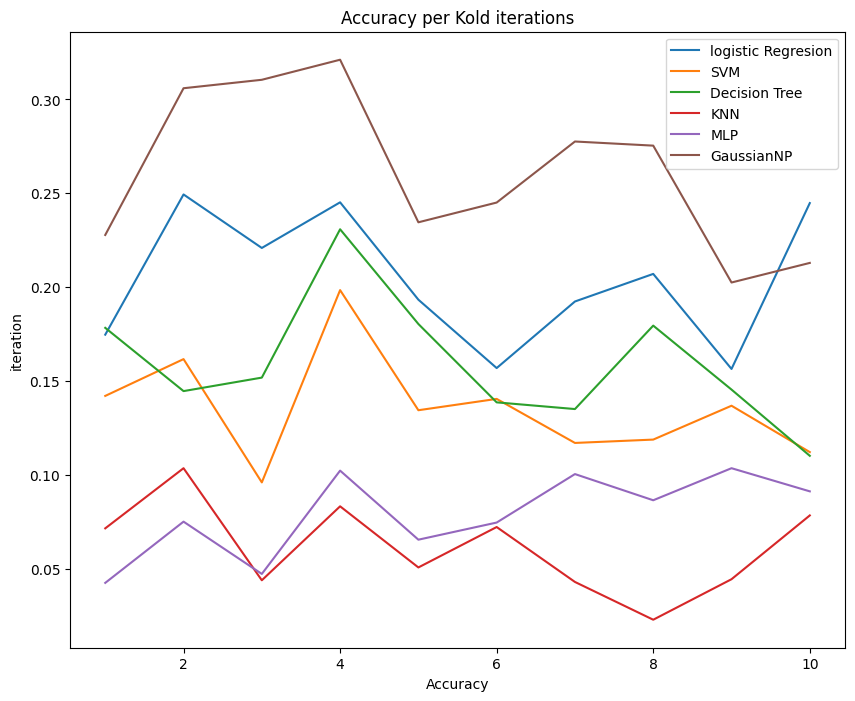

In [42]:
results = [("logistic Regresion",lr_results), ("SVM", svm_results), ("Decision Tree",ds_results), ("KNN",knn_results), ("MLP", mlp_results), ("GaussianNP", gnb_results)]
plt.figure(figsize=(10, 8))
for result in results:
    plt.plot(range(1, 11), result[1]['test_f1_score'],label=result[0]);
plt.title("Accuracy per Kold iterations")
plt.xlabel("Accuracy")
plt.ylabel("iteration")
plt.legend()

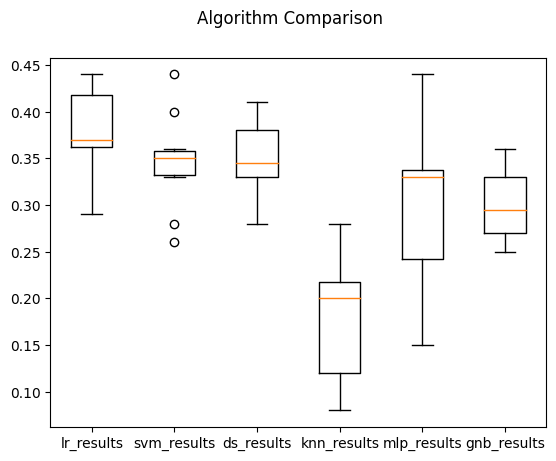

In [43]:
# boxplot algorithm comparison
metric = 'test_accuracy'
results1 = [lr_results[metric], svm_results[metric], ds_results[metric],
            knn_results[metric], mlp_results[metric], gnb_results[metric]]
names = ["lr_results", "svm_results", "ds_results", "knn_results", "mlp_results", "gnb_results"]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results1);
ax.set_xticklabels(names)
plt.show()